# LOO Testing

In [1]:
# Import libraries
from fastai.vision.all import *
from PIL import Image
import pandas as pd
import numpy as np
import torch
import os
import random

## Checkeo matrices confusión usando test sets

In [2]:
loo_datasets_dir = "./loo_datasets"
datasets_names = [dataset_name for dataset_name in os.listdir(loo_datasets_dir) if os.path.isdir(os.path.join(loo_datasets_dir, dataset_name))]

saved_loo_models_dir = "./loo_models"
models = [model_path for model_path in os.listdir(saved_loo_models_dir) if os.path.isdir(os.path.join(saved_loo_models_dir, model_path))]
models, datasets_names

(['02.1V0_out', '03V0_out', '11V0_out', '23V1_out', '7V0_out'],
 ['02.1V0_out', '03V0_out', '11V0_out', '23V1_out', '7V0_out'])

In [3]:
bocados = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(
        train_name="train",
        valid_name="test"
    ),
    get_y=parent_label,
    item_tfms=Resize(256, ResizeMethod.Squish)
)

d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


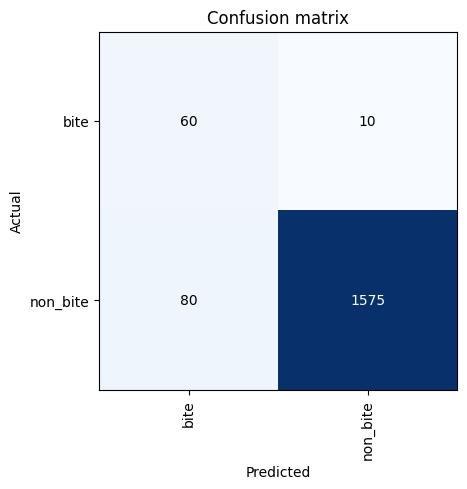

In [4]:
model_dir = models[0]   # 02.1V0    50% bite errors, not non bites though
dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
learn.load("min_error_checkpoint")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

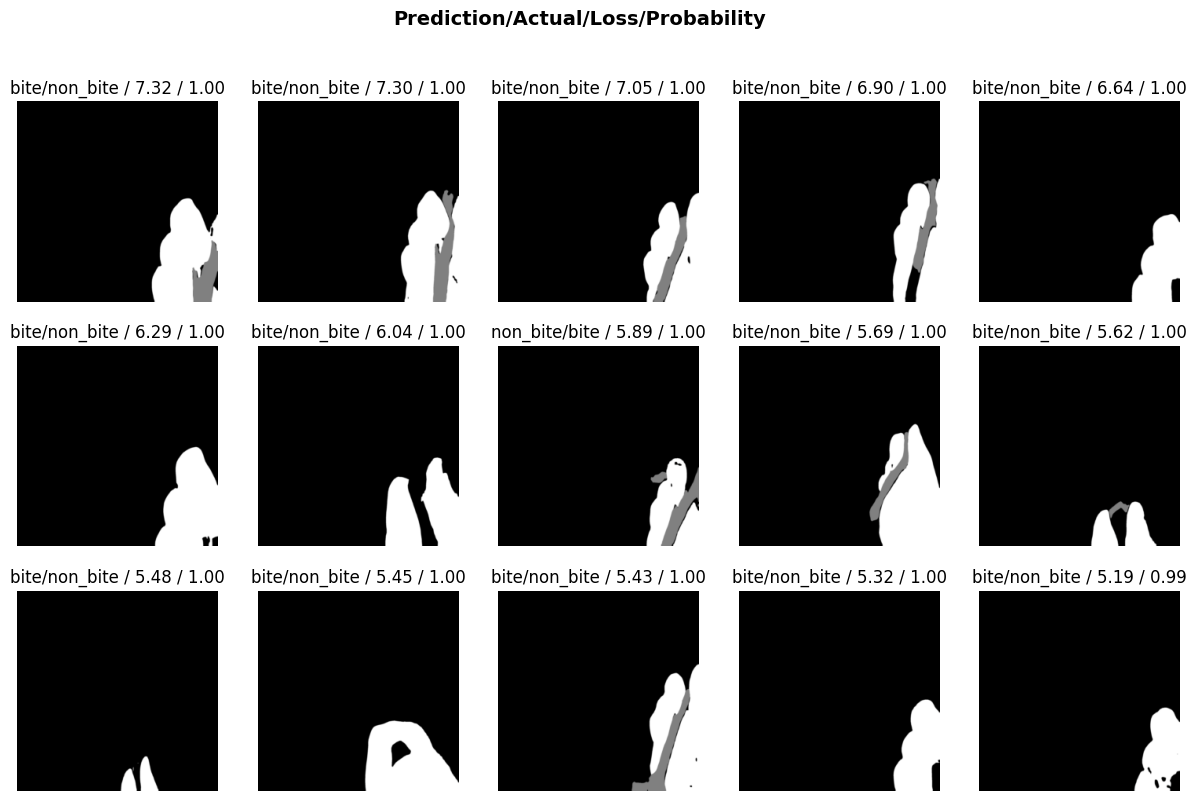

In [5]:
interp.plot_top_losses(15, nrows=3)

d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


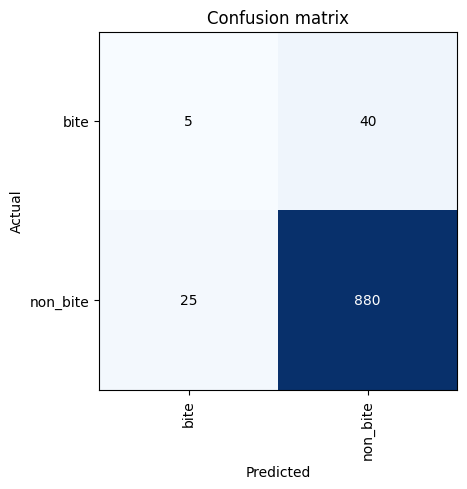

In [6]:
model_dir = models[1]   # 03V0 100% bite errors
dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
learn.load("min_error_checkpoint")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

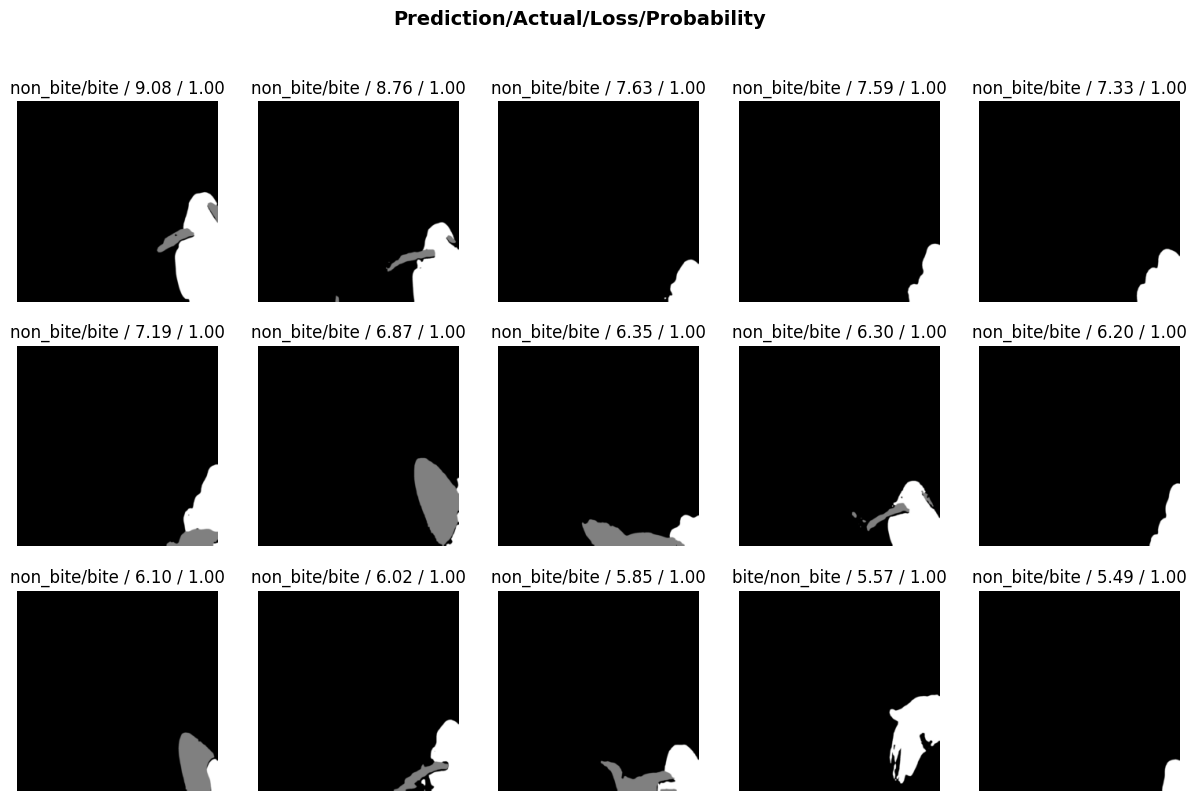

In [7]:
interp.plot_top_losses(15, nrows=3)

d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


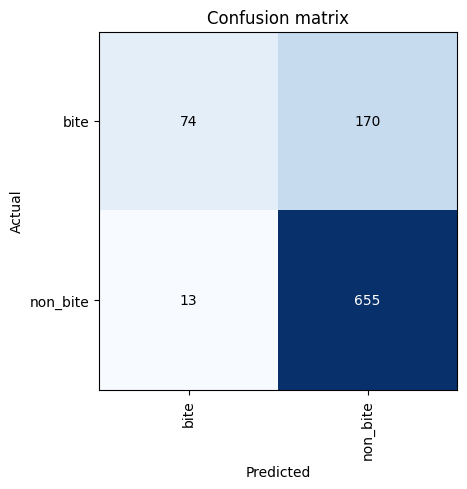

In [9]:
model_dir = models[2]   # 11V0 90% bite errors
dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
learn.load("min_error_checkpoint")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

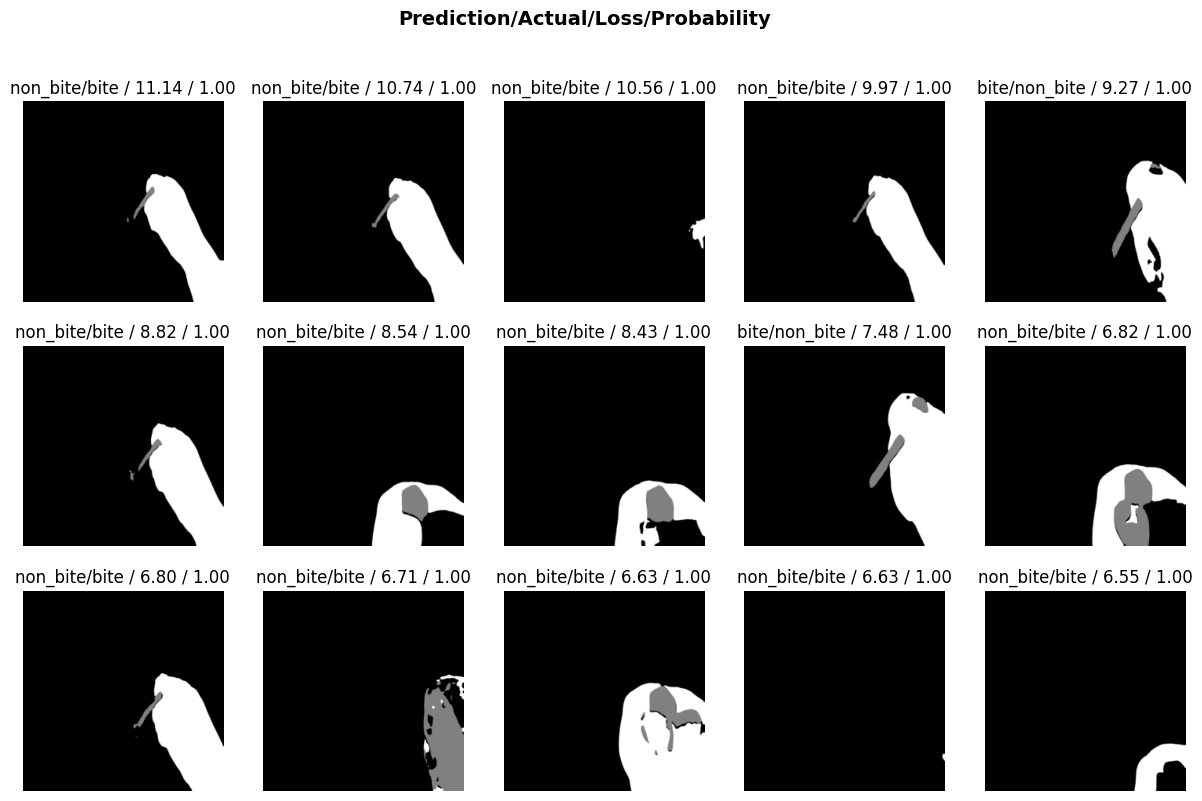

In [10]:
interp.plot_top_losses(15, nrows=3)

d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


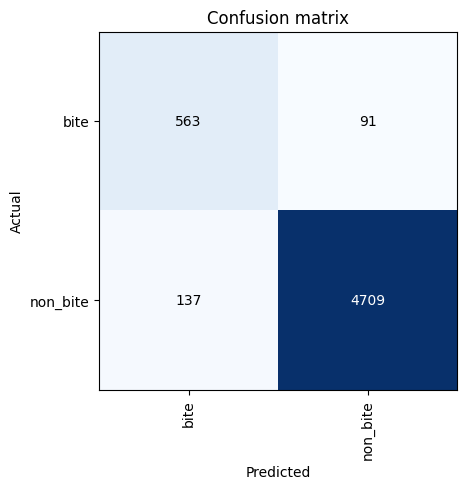

In [11]:
model_dir = models[3]   # 23_V1
dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
learn.load("min_error_checkpoint")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

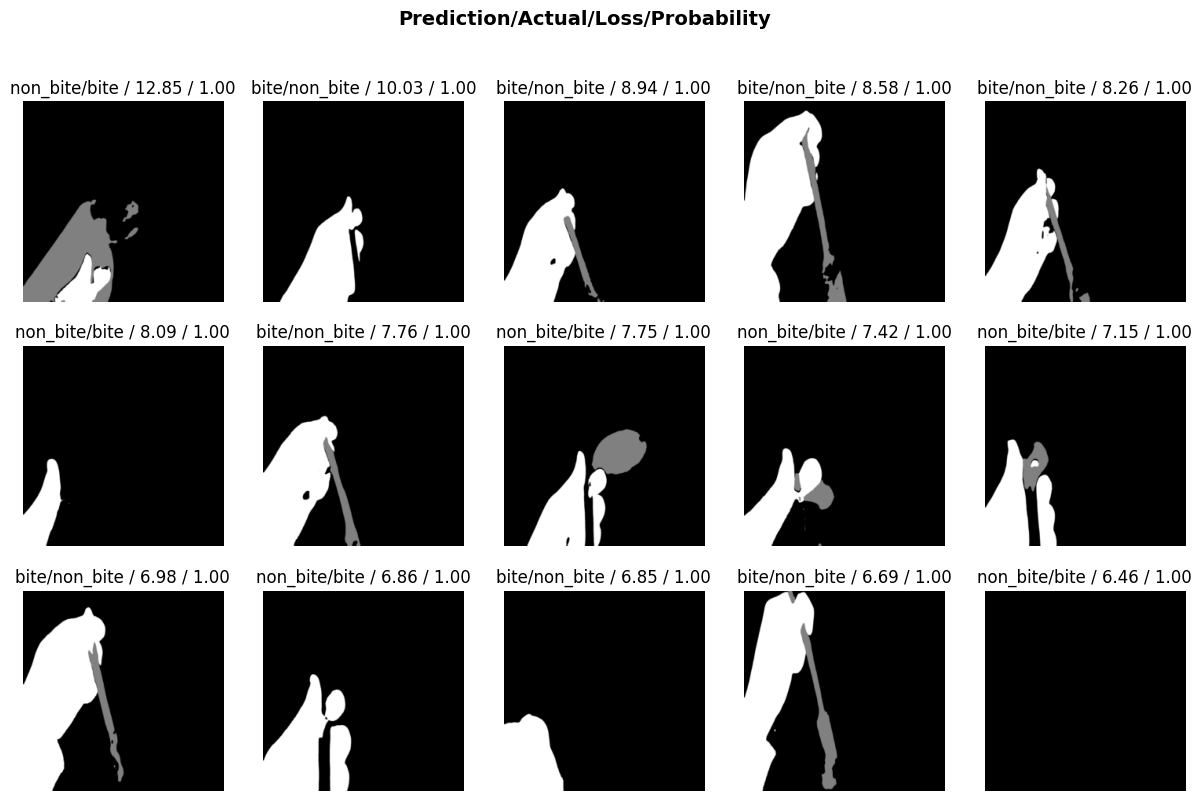

In [12]:
interp.plot_top_losses(15, nrows=3)

d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


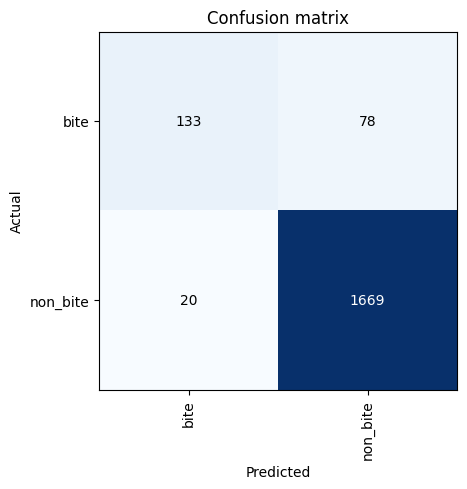

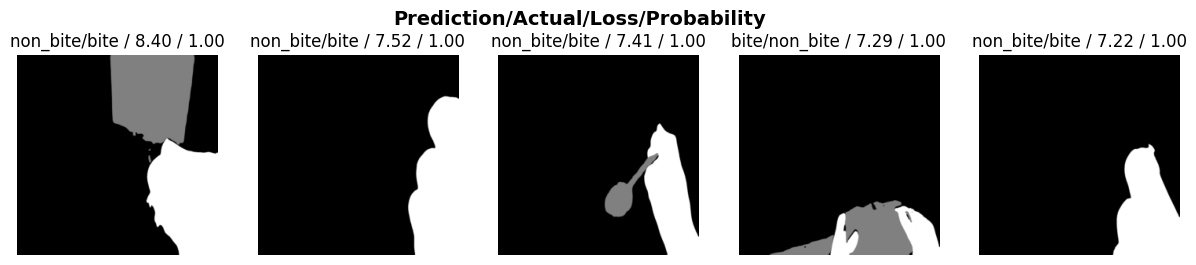

In [13]:
model_dir = models[4]   # 7V0
dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
learn.load("min_error_checkpoint")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

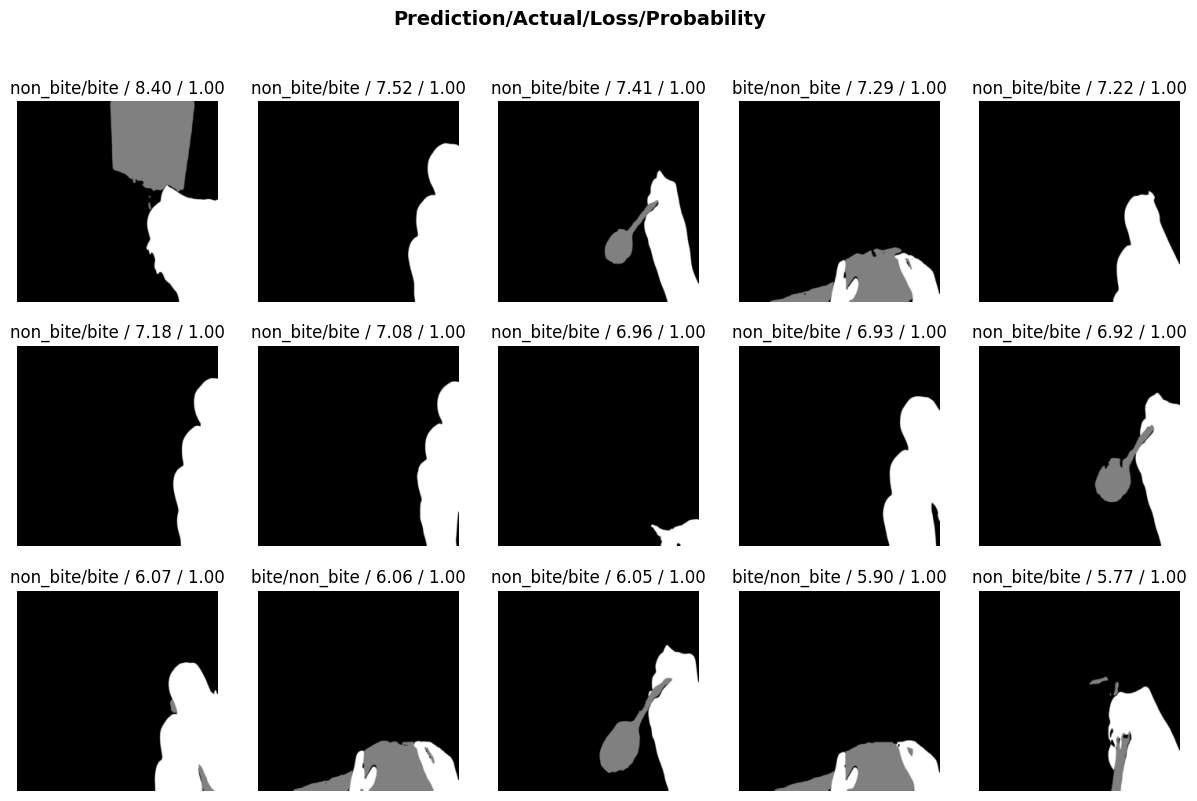

In [14]:
interp.plot_top_losses(15, nrows=3)

## Inferencia de ejemplos

### Vídeos de ejemplo a analizar + función de transformación

In [8]:
videos_folder = "D:/wrobles/analisis_videos/resultados"
EgoHOS_folder = "EgoHOS_Masks"
rh_videos = [
    "39V0.1_trimmed",
    "49V0_trimmed",
    "66V1_trimmed"
]
lh_videos = [
    "23V2_trimmed"
]

In [9]:
def normalize_image(image : np.array):
    numpy_image = np.array(image)
    mask = ((numpy_image != 1)
            & (numpy_image != 2)
            & (numpy_image != 3)
            & (numpy_image != 4)
            & (numpy_image != 5))
    numpy_image[mask] = 0
    numpy_image[numpy_image == 1] = 255
    numpy_image[numpy_image == 2] = 255
    numpy_image[numpy_image == 3] = 128
    numpy_image[numpy_image == 4] = 128
    numpy_image[numpy_image == 5] = 128
    pil_image = Image.fromarray(numpy_image.astype(np.uint8))
    return numpy_image, pil_image

def img_tfms_inf(image_path : Path):
    image = Image.open(image_path)
    _, pil_image = normalize_image(image)
    return pil_image.resize((256, 256), Image.NEAREST)


### Primero normal, sobre GPU

In [17]:
saved_loo_models_dir, models

('./loo_models', ['02.1V0_out', '03V0_out', '11V0_out', '23V1_out', '7V0_out'])

In [18]:
import time
for model_dir in models:
    print(f"Modelo usado: {model_dir}")
    dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
    learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
    learn.load(Path("min_error_checkpoint"))

    save_path = "min_error.pkl"
    learn.export(save_path)

    load_path = os.path.join(saved_loo_models_dir, model_dir, save_path)
    learn_inf = load_learner(load_path)

    random_rh_video = random.choice(rh_videos)
    full_random_path = Path(os.path.join(videos_folder, random_rh_video, EgoHOS_folder))
    random_image_path = random.choice(get_image_files(Path(full_random_path)))
    print(f"Imagen random ejemplo: {random_image_path}")

    start_time = time.time()

    pil_image = img_tfms_inf(random_image_path)
    predictions = learn_inf.predict(pil_image)
    print(f"Predicción: {predictions[0]}")
    
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Tiempo de predicción: {total_time}\n\n\n")


Modelo usado: 02.1V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\66V1_trimmed\EgoHOS_Masks\3427.0.png


Predicción: bite
Tiempo de predicción: 0.13501191139221191



Modelo usado: 03V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\49V0_trimmed\EgoHOS_Masks\309.0.png


Predicción: bite
Tiempo de predicción: 0.11457371711730957



Modelo usado: 11V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\49V0_trimmed\EgoHOS_Masks\689.0.png


Predicción: non_bite
Tiempo de predicción: 0.11025857925415039



Modelo usado: 23V1_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\66V1_trimmed\EgoHOS_Masks\5047.0.png


Predicción: bite
Tiempo de predicción: 0.1212613582611084



Modelo usado: 7V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\49V0_trimmed\EgoHOS_Masks\507.0.png


Predicción: bite
Tiempo de predicción: 0.11649394035339355





### A continuación sobre CPU

In [10]:
import torch
default_device = torch.device("cpu")

save_path = Path(os.path.join("D:/wrobles/analisis_videos/1.modelo_cucharadas/tmp/tmp.pkl"))
for model_dir in models:
    print(f"Modelo usado: {model_dir}")
    dls = bocados.dataloaders(Path(os.path.join(loo_datasets_dir, model_dir)))
    learn = vision_learner(dls, resnet18, path=Path(os.path.join(saved_loo_models_dir, model_dir)))
    learn.load(Path("min_error_checkpoint"))

    learn.export(save_path)
    learn_inf = load_learner(save_path, cpu=True)

    random_rh_video = random.choice(rh_videos)
    full_random_path = Path(os.path.join(videos_folder, random_rh_video, EgoHOS_folder))
    random_image_path = random.choice(get_image_files(Path(full_random_path)))
    print(f"Imagen random ejemplo: {random_image_path}")

    start_time = time.time()

    pil_image = img_tfms_inf(random_image_path)
    predictions = learn_inf.predict(pil_image)
    print(f"Predicción: {predictions[0]}")
    
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Tiempo de predicción: {total_time}\n\n\n")


Modelo usado: 02.1V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\49V0_trimmed\EgoHOS_Masks\1074.0.png


Predicción: non_bite
Tiempo de predicción: 0.6141762733459473



Modelo usado: 03V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\66V1_trimmed\EgoHOS_Masks\2532.0.png


Predicción: non_bite
Tiempo de predicción: 0.11910152435302734



Modelo usado: 11V0_out


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\39V0.1_trimmed\EgoHOS_Masks\24.0.png


Predicción: non_bite
Tiempo de predicción: 0.11021804809570312



Modelo usado: 23V1_out
Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\49V0_trimmed\EgoHOS_Masks\581.0.png


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Predicción: non_bite
Tiempo de predicción: 0.10261154174804688



Modelo usado: 7V0_out
Imagen random ejemplo: D:\wrobles\analisis_videos\resultados\66V1_trimmed\EgoHOS_Masks\5417.0.png


d:\wrobles\venvs\fastai\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


Predicción: non_bite
Tiempo de predicción: 0.0979461669921875



